<h2 style='color:blue' align="center">K Nearest Neighbors Classification</h2>

# Importing Libraries

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Loading dataset

In [23]:
df=pd.read_csv("Classified Data.csv",index_col=0)

In [24]:
df.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
Column1                                                                         
0        0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1        0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2        0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3        1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4        1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   

              PJF       HQE       NXJ  TARGET CLASS  
Column1                                              
0        0.643798  0.879422  1.231409             1  
1        1.013546  0.621552  1.492702             0  
2        1.154483  0.957877  1.285597             0  
3        1.380003  1.522692  1.153093             1  
4        0.646691  1.463812  1.419167             1

# Standardization

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler=StandardScaler()

In [28]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [29]:
scaled_feat=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [30]:
df_feat=pd.DataFrame(scaled_feat,columns=df.columns[:-1])

In [31]:
df_feat.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   
3  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208   
4  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782   

        PJF       HQE       NXJ  
0 -1.482368 -0.949719 -0.643314  
1 -0.202240 -1.828051  0.636759  
2  0.285707 -0.682494 -0.377850  
3  1.066491  1.241325 -1.026987  
4 -1.472352  1.040772  0.276510

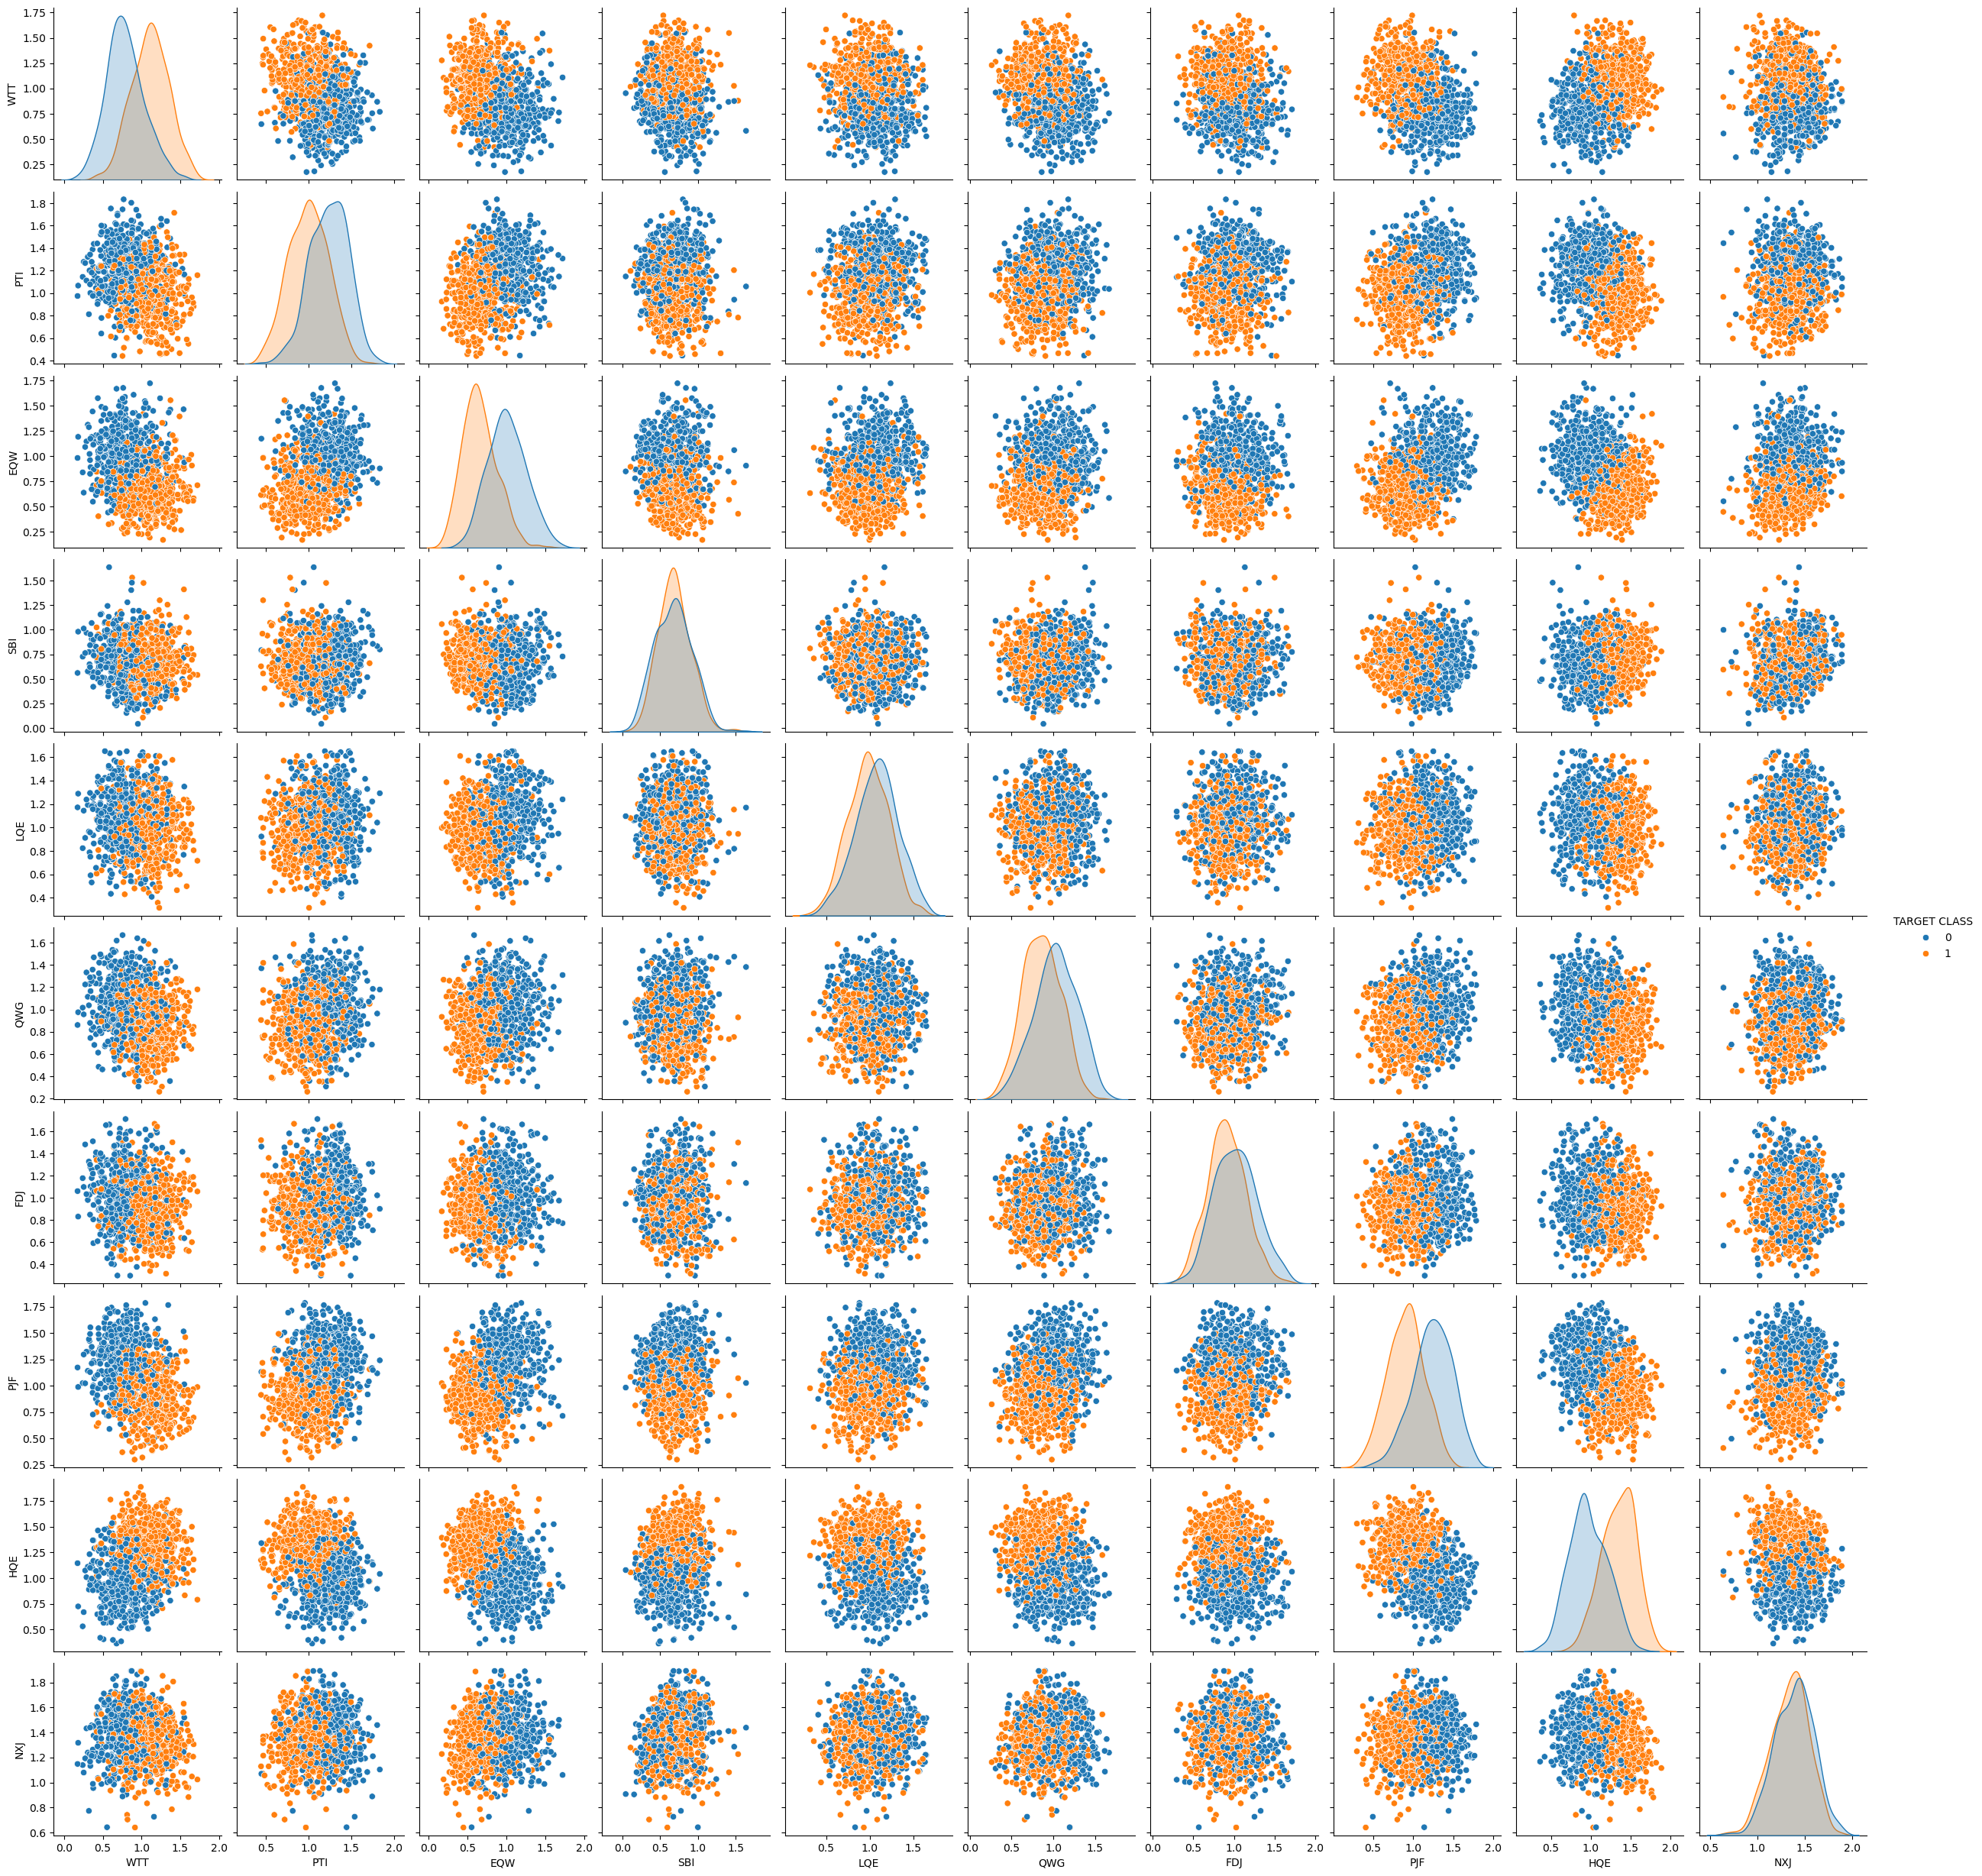

In [32]:
sns.pairplot(df,hue='TARGET CLASS')

# Splitting data into training and testing datasets

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(scaled_feat,df['TARGET CLASS'],test_size=0.3)

# Model Selection and Training

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn=KNeighborsClassifier(n_neighbors=1)

In [39]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Model Testing ,Performance Analysis

In [41]:
pred=knn.predict(X_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [43]:
print(confusion_matrix(y_test,pred))

[[139  15]
 [ 12 134]]


In [44]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       154
           1       0.90      0.92      0.91       146

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



# Cross Validation and Elbow Method
For choosing best k value we can use these  methods

In [78]:
acc_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
    acc_rate.append(score.mean())
print(acc_rate)
    

[0.9109999999999999, 0.909, 0.9280000000000002, 0.9339999999999999, 0.9289999999999999, 0.929, 0.9310000000000003, 0.9340000000000002, 0.9289999999999999, 0.9350000000000002, 0.9329999999999998, 0.9350000000000002, 0.937, 0.9410000000000001, 0.9390000000000001, 0.9390000000000001, 0.9349999999999999, 0.9360000000000002, 0.9360000000000002, 0.9360000000000002, 0.9339999999999999, 0.9359999999999999, 0.93, 0.933, 0.9349999999999999, 0.937, 0.9380000000000001, 0.938, 0.937, 0.9390000000000001, 0.9360000000000002, 0.943, 0.937, 0.9390000000000001, 0.9390000000000001, 0.9400000000000001, 0.9369999999999999, 0.943, 0.9410000000000001]


In [76]:
err_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
    err_rate.append(1-score.mean())
print(err_rate)
    

[0.08900000000000008, 0.09099999999999997, 0.07199999999999984, 0.06600000000000006, 0.07100000000000006, 0.07099999999999995, 0.06899999999999973, 0.06599999999999984, 0.07100000000000006, 0.06499999999999984, 0.06700000000000017, 0.06499999999999984, 0.06299999999999994, 0.05899999999999994, 0.06099999999999994, 0.06099999999999994, 0.06500000000000006, 0.06399999999999983, 0.06399999999999983, 0.06399999999999983, 0.06600000000000006, 0.06400000000000006, 0.06999999999999995, 0.06699999999999995, 0.06500000000000006, 0.06299999999999994, 0.061999999999999944, 0.062000000000000055, 0.06299999999999994, 0.06099999999999994, 0.06399999999999983, 0.05700000000000005, 0.06299999999999994, 0.06099999999999994, 0.06099999999999994, 0.05999999999999994, 0.06300000000000006, 0.05700000000000005, 0.05899999999999994]


In [80]:
err_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    err_rate.append(np.mean(pred_i!=y_test))
print(err_rate)
    

[0.09, 0.09666666666666666, 0.09, 0.07333333333333333, 0.07333333333333333, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.07333333333333333, 0.07333333333333333, 0.07, 0.06333333333333334, 0.06666666666666667, 0.06, 0.06333333333333334, 0.056666666666666664, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.056666666666666664, 0.056666666666666664, 0.056666666666666664, 0.06333333333333334, 0.06333333333333334, 0.06666666666666667, 0.06, 0.06666666666666667, 0.06333333333333334, 0.07, 0.07, 0.07, 0.06666666666666667, 0.07, 0.06666666666666667, 0.07]


Text(0.5, 0, 'K')

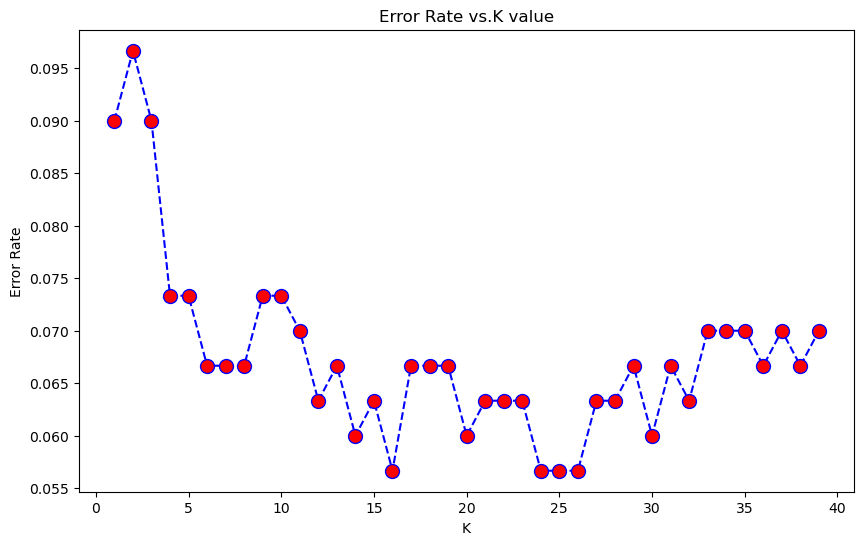

In [81]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),err_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title("Error Rate vs.K value")
plt.ylabel('Error Rate')
plt.xlabel('K')

Text(0.5, 0, 'K')

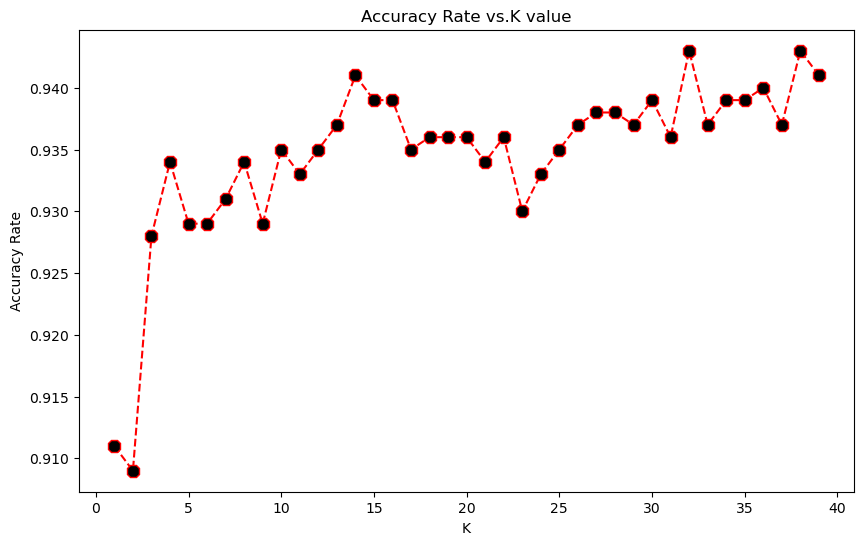

In [84]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc_rate,color='red',linestyle='dashed',marker='8',
        markerfacecolor='black',markersize=10)
plt.title("Accuracy Rate vs.K value")
plt.ylabel('Accuracy Rate')
plt.xlabel('K')

In [86]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('With K=1')
print("\n")
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

With K=1


[[139  15]
 [ 12 134]]


              precision    recall  f1-score   support

           0       0.92      0.90      0.91       154
           1       0.90      0.92      0.91       146

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [103]:
knn=KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('With K=24')
print("\n")
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

With K=24


[[144  10]
 [  7 139]]


              precision    recall  f1-score   support

           0       0.95      0.94      0.94       154
           1       0.93      0.95      0.94       146

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

